## Predicting Wine Quality

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os

df_white = pd.read_csv('winequality-white.csv', sep=";")
df_red = pd.read_csv('winequality-red.csv', sep=";")

#setting up features (x) and target (y)
x_white = df_white.drop(columns=['quality'])
y_white = df_white['quality']

x_red = df_red.drop(columns=['quality'])
y_red = df_red['quality']

#split into training and testing data
x_white_train, x_white_test, y_white_train, y_white_test = train_test_split(x_white, y_white, test_size=0.2, random_state=42)
x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(x_red, y_red, test_size=0.2, random_state=42)

Linear Regression

In [2]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Initialize the model (Linear Regression)
model_white = LinearRegression()
model_red = LinearRegression()
model_white.fit(x_white_train, y_white_train)
model_red.fit(x_red_train, y_red_train)

# Make predictions on the test set
y_white_pred = model_white.predict(x_white_test)
y_red_pred = model_red.predict(x_red_test)

# Evaluate the model using regression metrics
lr_white_mse = mean_squared_error(y_white_test, y_white_pred)
lr_white_mae = mean_absolute_error(y_white_test, y_white_pred)
lr_white_r2 = r2_score(y_white_test, y_white_pred)

lr_red_mse = mean_squared_error(y_red_test, y_red_pred)
lr_red_mae = mean_absolute_error(y_red_test, y_red_pred)
lr_red_r2 = r2_score(y_red_test, y_red_pred)

Random Forest

In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor, fit to data, and predict
rf_white_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", n_jobs=-1, random_state=42)
rf_red_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", n_jobs=-1, random_state=42)
rf_white_model.fit(x_white_train, y_white_train)
rf_red_model.fit(x_red_train, y_red_train)
y_white_pred = rf_white_model.predict(x_white_test)
y_red_pred = rf_red_model.predict(x_red_test)

# Evaluate the model
rf_white_mse = mean_squared_error(y_white_test, y_white_pred)
rf_white_mae = mean_absolute_error(y_white_test, y_white_pred)
rf_white_r2 = r2_score(y_white_test, y_white_pred)
rf_red_mse = mean_squared_error(y_red_test, y_red_pred)
rf_red_mae = mean_absolute_error(y_red_test, y_red_pred)
rf_red_r2 = r2_score(y_red_test, y_red_pred)

Model Comparison Plotter

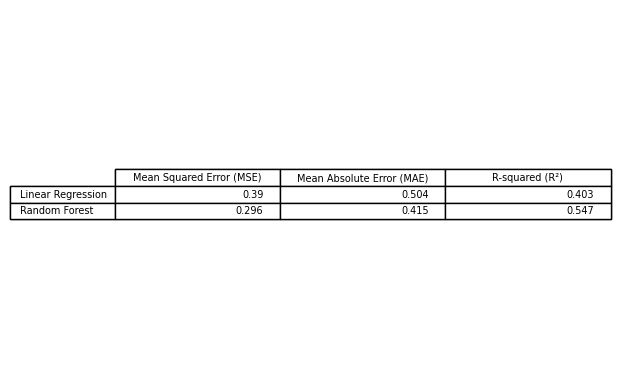

In [4]:
columns = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']
rows = ['Linear Regression', 'Random Forest']
white_data = [
    [round(lr_white_mse, 3), round(lr_white_mae, 3), round(lr_white_r2, 3)],
    [round(rf_white_mse, 3), round(rf_white_mae, 3), round(rf_white_r2, 3)]
]
red_data = [
    [round(lr_red_mse, 3), round(lr_red_mae, 3), round(lr_red_r2, 3)],
    [round(rf_red_mse, 3), round(rf_red_mae, 3), round(rf_red_r2, 3)]
]

# Create a figure and axis
fig, ax = plt.subplots()

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table
white_table = plt.table(cellText=white_data, colLabels=columns, rowLabels=rows, loc='center')
red_table = plt.table(cellText=red_data, colLabels=columns, rowLabels=rows, loc='center')

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# File path
file_path = os.path.join(output_dir, "white_model_comparisson_table.png")
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = plt.table(cellText=white_data, colLabels=columns, rowLabels=rows, loc='center')
plt.savefig(file_path, bbox_inches='tight')
plt.close()

file_path = os.path.join(output_dir, "red_model_comparisson_table.png")
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = plt.table(cellText=red_data, colLabels=columns, rowLabels=rows, loc='center')
plt.savefig(file_path, bbox_inches='tight')
plt.close()

## Feature Importance

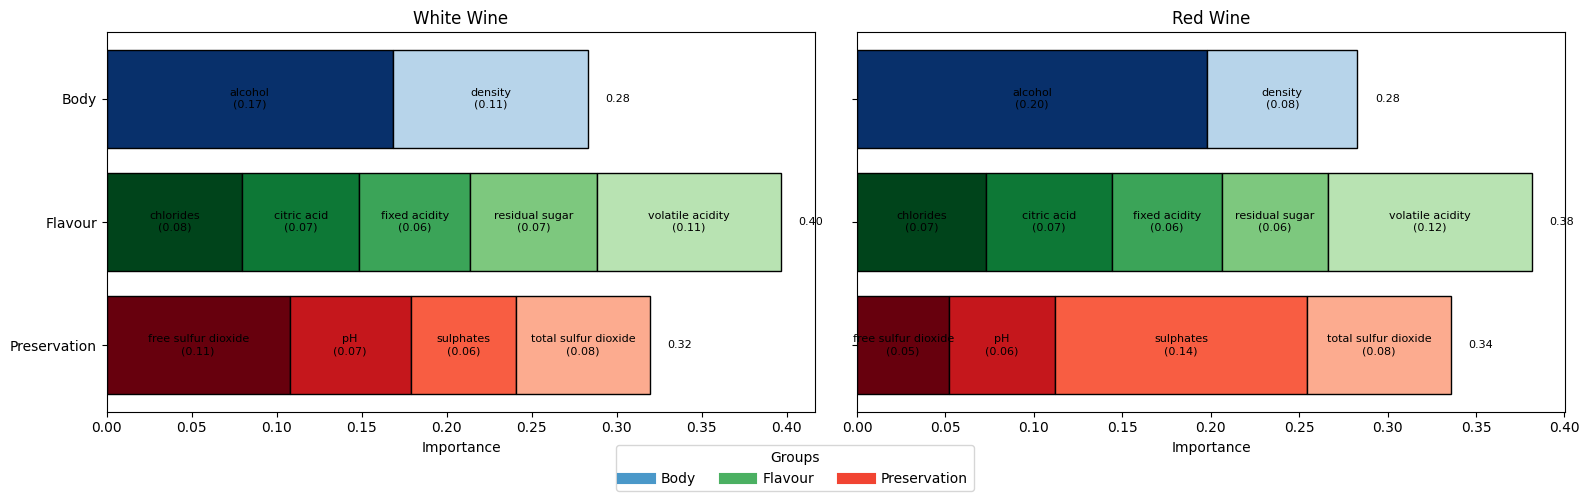

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Grouping of features
feature_groups = {
    'Body': ['alcohol', 'density'],
    'Flavour': ['residual sugar', 'volatile acidity', 'citric acid', 'fixed acidity', 'chlorides'],
    'Preservation': ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'pH']
}

# Function to prepare data and sort features alphabetically within groups
def prepare_data(model_importances, feature_columns):
    importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': model_importances
    }).sort_values(by='Feature')  # Sort alphabetically first

    # Map features to groups
    importance_df['Group'] = importance_df['Feature'].map(
        lambda x: next((g for g, features in feature_groups.items() if x in features), 'Other')
    )

    # Sort within groups alphabetically
    importance_df = importance_df.sort_values(by=['Group', 'Feature'])
    return importance_df

# Prepare data for both models
white_importance_df = prepare_data(rf_white_model.feature_importances_, x_white_train.columns)
red_importance_df = prepare_data(rf_red_model.feature_importances_, x_red_train.columns)

# Group data
white_group_data = white_importance_df.groupby('Group')
red_group_data = red_importance_df.groupby('Group')
groups = ['Preservation', 'Flavour', 'Body']  # Reverse order here

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
color_palettes = {
    'Body': plt.cm.Blues,
    'Flavour': plt.cm.Greens,
    'Preservation': plt.cm.Reds
}

for ax, group_data, title in zip(axes, [white_group_data, red_group_data], ['White Wine', 'Red Wine']):
    bar_positions = np.arange(len(groups))  # Ensure consistent y-axis positions
    bottoms = np.zeros(len(groups))  # Reset stacking

    for i, group_name in enumerate(groups):
        features = group_data.get_group(group_name)
        feature_importances = features['Importance'].tolist()
        feature_names = features['Feature'].tolist()
        num_features = len(feature_importances)

        # Generate color shades for the current group (decreasing intensity)
        colors = [color_palettes[group_name](1 - (0.7 * (j / max(num_features - 1, 1)))) for j in range(num_features)]

        # Add stacked bars
        for j, (importance, feature) in enumerate(zip(feature_importances, feature_names)):
            bar = ax.barh(bar_positions[i], importance, left=bottoms[i], color=colors[j], edgecolor='black')

            # Calculate label position
            label_x = bottoms[i] + importance / 2

            # Add vertical labels for each bar
            ax.text(
                label_x,
                bar_positions[i],
                f"{feature}\n({importance:.2f})",
                ha='center',
                va='center',
                rotation=0,  # Rotate text vertically
                color='black',
                fontsize=8
            )
            bottoms[i] += importance  # Update stacking

        # Add total value at the end of the group bar
        total_value = bottoms[i]
        ax.text(
            total_value + 0.01,  # Slightly offset from the bar
            bar_positions[i],
            f"{total_value:.2f}",
            ha='left',
            va='center',
            color='black',
            fontsize=8
        )

    # Customize each subplot
    ax.set_yticks(bar_positions)
    ax.set_yticklabels(groups)  # Ensure y-tick labels reflect reversed order
    ax.set_xlabel('Importance')
    ax.set_title(f'{title}')

# Add a shared legend outside the plot area
group_handles = [
    plt.Line2D([0], [0], color=color_palettes[group_name](0.6), lw=8, label=group_name)
    for group_name in feature_groups.keys()
]
fig.legend(handles=group_handles, title="Groups", loc='lower center', ncol=len(feature_groups))

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Ensure the chart fits within the remaining area

# Save the figure instead of displaying
plt.savefig('output/feature_importance_plot.png', dpi=300, bbox_inches='tight')  # Save as a PNG file with high resolution


Shap Values

In [6]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# SHAP values for white and red wine models
shap_values_white = shap.TreeExplainer(rf_white_model).shap_values(x_white_train)
shap_values_red = shap.TreeExplainer(rf_red_model).shap_values(x_red_train)

# Raw feature values
x_white_values = x_white_train.values
x_red_values = x_red_train.values

# Features for plotting
feature_names = x_white_train.columns

# Define feature groups and manually specify feature order
feature_groups = {
    'Body': ['alcohol', 'density'],
    'Flavour': ['residual sugar', 'volatile acidity', 'citric acid', 'fixed acidity', 'chlorides'],
    'Preservation': ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'pH']
}

# Flatten feature order from groups
manual_feature_order = [feature for group in feature_groups.values() for feature in group]

# Align SHAP and feature values to the manual feature order
feature_order_indices = [list(feature_names).index(feature) for feature in manual_feature_order]
ordered_feature_names = np.array(feature_names)[feature_order_indices]
shap_values_white = shap_values_white[:, feature_order_indices]
shap_values_red = shap_values_red[:, feature_order_indices]
raw_white_values = x_white_values[:, feature_order_indices]
raw_red_values = x_red_values[:, feature_order_indices]

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


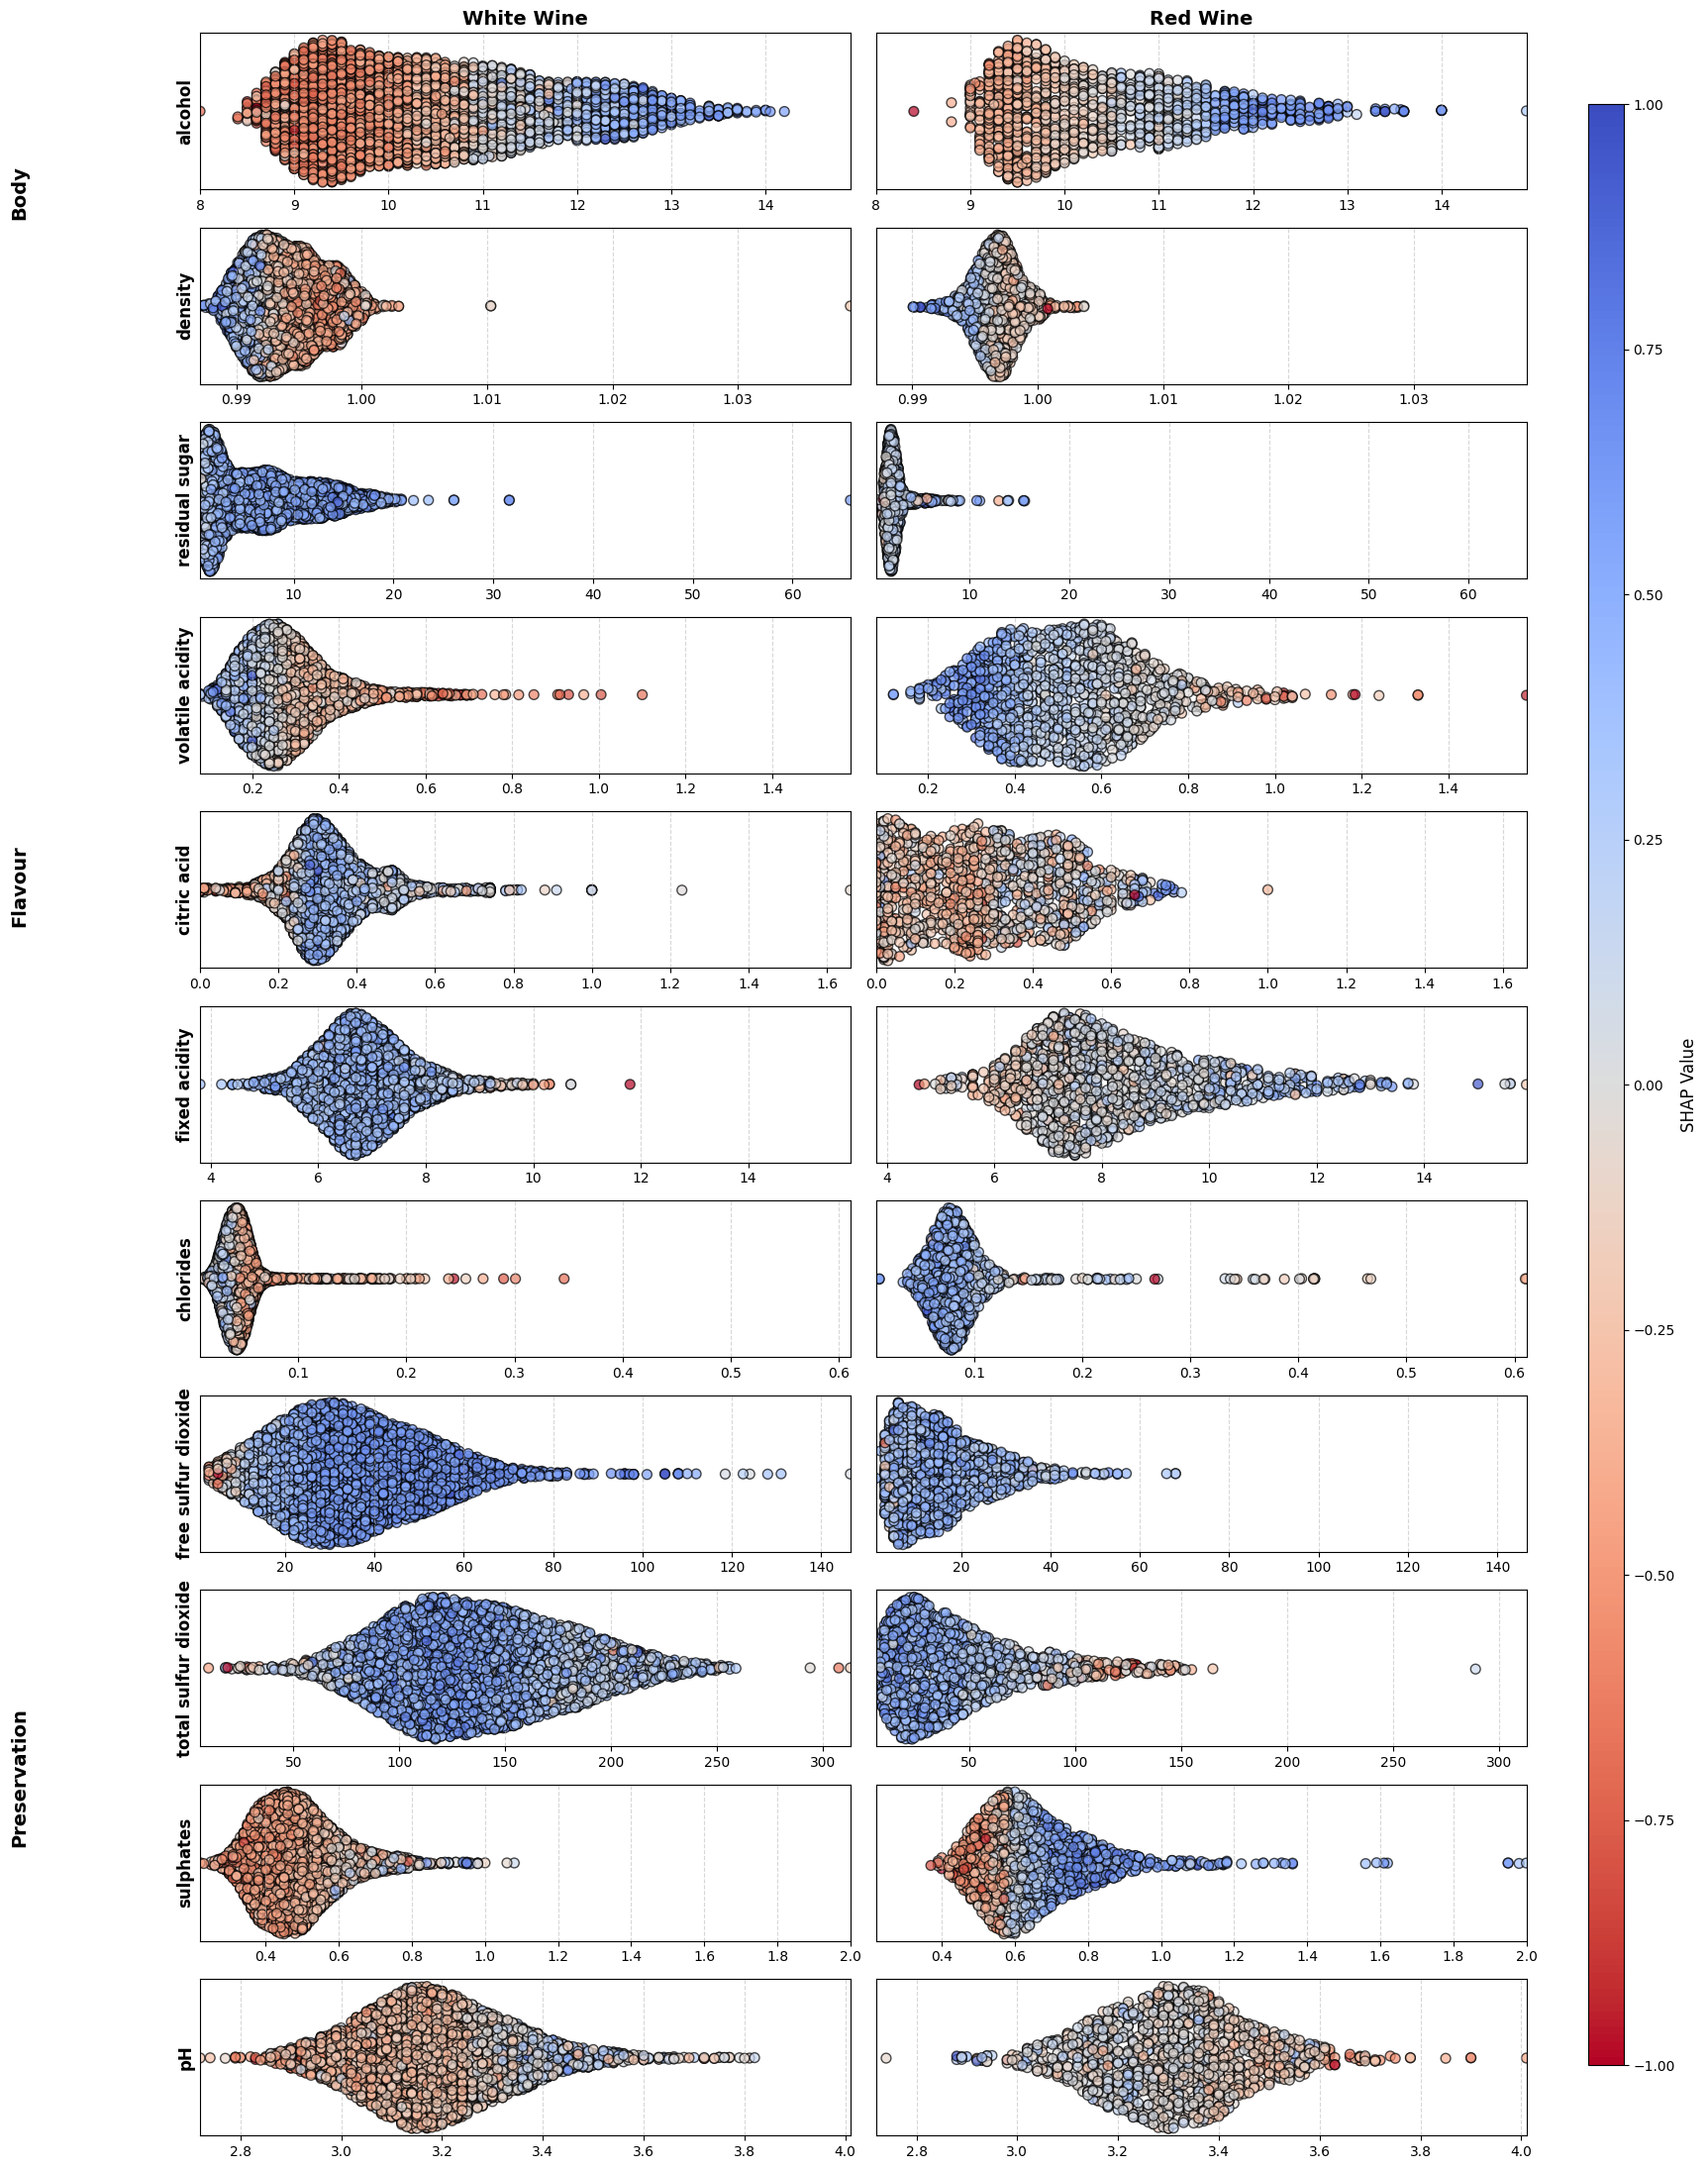

In [34]:
# Create a new figure with subplots for each feature
num_features = len(manual_feature_order)
fig, axes = plt.subplots(num_features, 2, figsize=(18, num_features * 2), sharey=False)

# Plot each feature independently for white and red wine
for i, feature in enumerate(manual_feature_order):
    # Calculate shared x-axis limits for this feature across both datasets
    combined_min = min(raw_white_values[:, i].min(), raw_red_values[:, i].min())
    combined_max = max(raw_white_values[:, i].max(), raw_red_values[:, i].max())
    
    for ax, shap_values, raw_values, title in zip(
        axes[i],  # Each row of axes corresponds to the current feature
        [shap_values_white, shap_values_red],
        [raw_white_values, raw_red_values],
        ['White Wine', 'Red Wine']
    ):
        # Get SHAP values and raw feature values for this feature
        shap_col = shap_values[:, i]
        feat_col = raw_values[:, i]
        
        # Compute density of raw feature values
        kde = gaussian_kde(feat_col)
        density = kde(feat_col)
        
        # Scale density to control maximum jitter
        max_deviation = density / density.max() * 0.4  # Adjust scaling factor as needed
        
        # Generate random jitter with density-based cap
        y = np.random.uniform(-max_deviation, max_deviation) + i  # Center around feature index `i`
        
        # Normalize SHAP values to [0, 1]
        shap_col_normalized = (shap_col - shap_col.min()) / (shap_col.max() - shap_col.min())
        
        # Map SHAP values to colors (reversed colormap: red for low, blue for high)
        cmap = plt.cm.coolwarm.reversed()
        colors = cmap(shap_col_normalized)

        # Scatter plot for this feature
        ax.scatter(
            feat_col,
            y,
            color=colors,
            edgecolor="k",
            alpha=0.7,
            s=50,
        )
        
        # Set shared x-axis limits
        ax.set_xlim(combined_min, combined_max)

        # Set subplot title and labels
        if i == 0:  # Add column titles to the top row
            ax.set_title(title, fontsize=14, fontweight='bold')
        if title == 'White Wine':
            ax.set_ylabel(feature, fontsize=12, fontweight='bold')
        ax.grid(axis="x", linestyle="--", alpha=0.5)
        
        # Remove y-axis for clean layout
        ax.set_yticks([])

# Add group labels
y_offsets = [0]  # Track the starting index of each group
for group, features in feature_groups.items():
    y_offsets.append(y_offsets[-1] + len(features))  # Calculate offset for each group

for idx, group in enumerate(feature_groups.keys()):
    # Center the label vertically within its group
    group_center = (y_offsets[idx] + y_offsets[idx + 1] - 1) / 2
    group_center_normalized = 1 - (group_center + 0.5) / num_features  # Add padding adjustment
    
    fig.text(
        0.02,  # Position label to the far left
        group_center_normalized,  # Normalize position relative to feature count and padding
        group,
        fontsize=14,
        fontweight='bold',
        rotation=90,  # Vertical text
        ha="center",
        va="center",
    )

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0.1, 0, 0.88, 1])  # Leave more space for the extended color bar

# Add an extended color bar for the entire figure
cbar_ax = fig.add_axes([0.9, 0.05, 0.02, 0.9])  # Adjust height to span nearly the entire figure
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm.reversed(), norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_label("SHAP Value", fontsize=12)

# Save the figure
output_path = "output/shap_values.png"  # Replace with your desired path
plt.savefig(output_path, dpi=300, bbox_inches="tight")


In [6]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
df_white = pd.read_csv('winequality-white.csv', sep=";")
df_red = pd.read_csv('winequality-red.csv', sep=";")

# Set up features (X) and target (y)
X_white = df_white.drop(columns=['quality'])
y_white = df_white['quality']

X_red = df_red.drop(columns=['quality'])
y_red = df_red['quality']

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", n_jobs=-1, random_state=42)
}

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

def cross_validate_model(model, X, y):
    mse_scores, mae_scores, r2_scores = [], [], []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Compute metrics
        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    
    return {
        "MSE": (np.mean(mse_scores), np.std(mse_scores)),
        "MAE": (np.mean(mae_scores), np.std(mae_scores)),
        "R²": (np.mean(r2_scores), np.std(r2_scores))
    }

# Evaluate both models for red and white wine
results_white = {name: cross_validate_model(model, X_white, y_white) for name, model in models.items()}
results_red = {name: cross_validate_model(model, X_red, y_red) for name, model in models.items()}

# Display results in tables
def plot_results_table(results, title, file_name):
    columns = ["Metric", "Mean", "Std Dev"]
    rows = []

    for model_name, metrics in results.items():
        for metric_name, (mean, std) in metrics.items():
            rows.append([f"{model_name} - {metric_name}", f"{mean:.3f}", f"{std:.3f}"])
    
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    table = plt.table(cellText=rows, colLabels=columns, loc='center')
    plt.title(title)
    plt.savefig(file_name, bbox_inches='tight')
    plt.close()

# Plot tables
plot_results_table(results_white, "White Wine Model Performance", "output/white_wine_results.png")
plot_results_table(results_red, "Red Wine Model Performance", "output/red_wine_results.png")
